In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [37]:
sndata = pd.read_csv('Social_Network_Ads.csv')

In [38]:
sndata.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


In [39]:
# drop user id feature
sndata.drop(['User ID'], axis=1, inplace=True)

In [40]:
sndata.head(2)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0


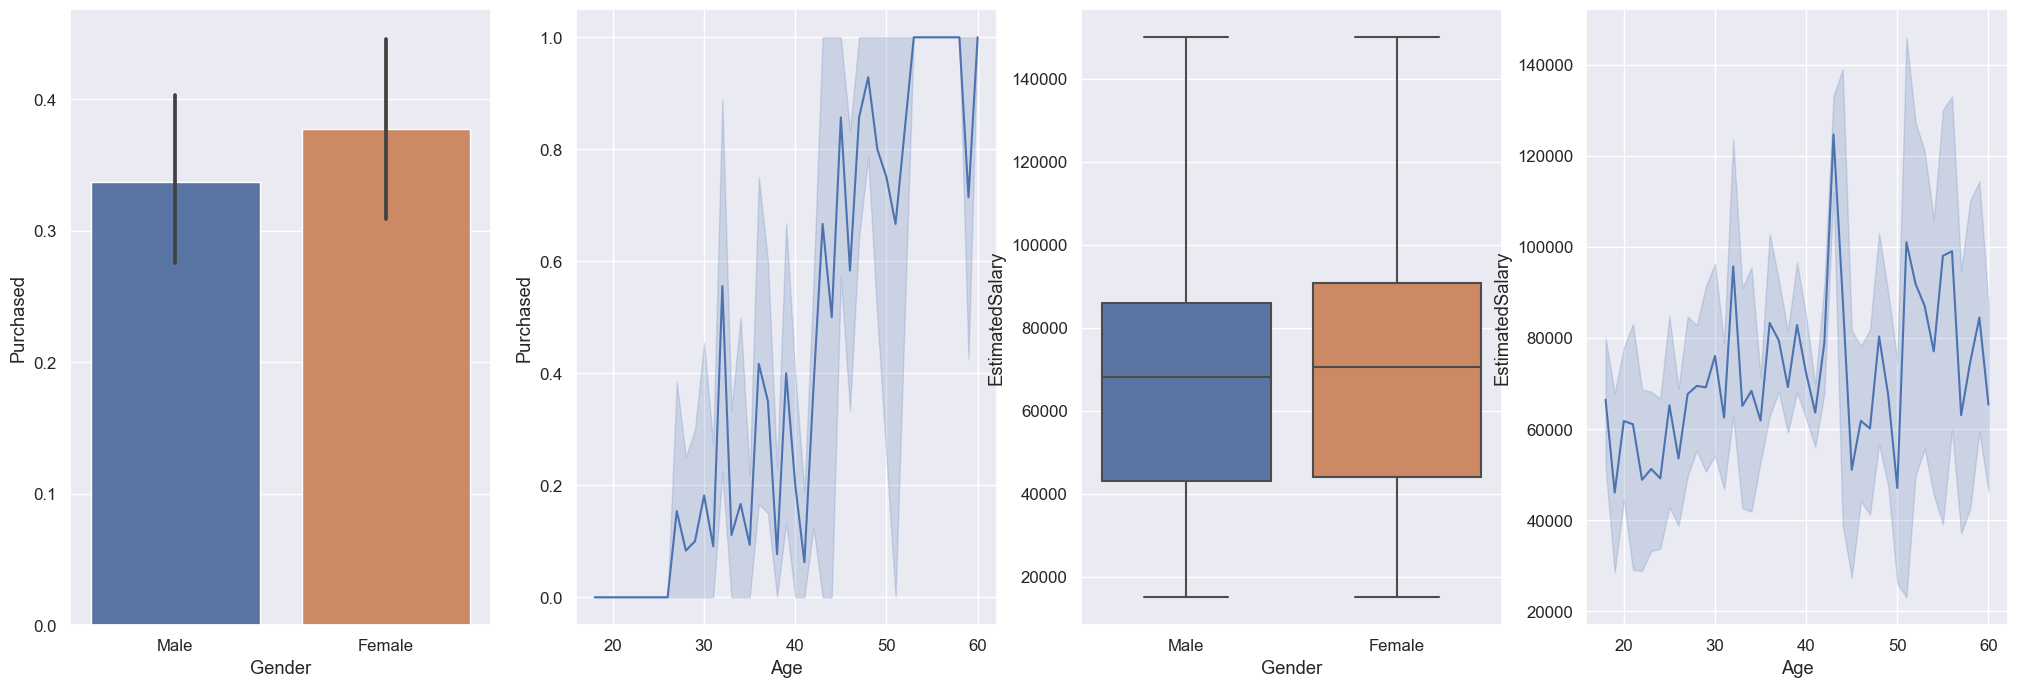

In [41]:
fig, ax =plt.subplots(1,4,figsize=(25,8))

sns.barplot(y=sndata['Purchased'],x=sndata['Gender'],ax=ax[0])
sns.lineplot(x=sndata['Age'],y=sndata['Purchased'],ax=ax[1])
sns.boxplot(y=sndata['EstimatedSalary'],x=sndata['Gender'],ax=ax[2])
sns.lineplot(y=sndata['EstimatedSalary'],x=sndata['Age'],ax=ax[3])

fig.set_figwidth(25)
fig.show()

Observation from the graphs

Plot 1. Female Purchased more than Males

Plot 2 : People who are above the age of 40 are likely to be purchased more.

Plot 3: Both the Male and Female Salaries are roughly between the range of 45000 - 80000, and it extends more than 140000
    
Plot 4 : The Estimated Salary Seems to be roughly distributed against the Age

In [42]:
# one hot encoding for categorial variables

sndata = pd.get_dummies(sndata, columns=['Gender'])

In [43]:
sndata.head(3)

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0


In [44]:
# seperate independent and dependent variables
X = sndata.iloc[:, [0,1,3,4]].values
y = sndata.iloc[:,2].values

In [45]:
# splitting dataset into training and test dataset
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [46]:
# feature scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
# Training NavieBayes model on dataset
from sklearn.naive_bayes import GaussianNB

classifer = GaussianNB()
classifer.fit(X_train, y_train)

GaussianNB()

In [48]:
# predicting test dataset
y_pred = classifer.predict(X_test)

In [49]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [50]:
# creating confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [51]:
print('Test accuracy:', ac)

Test accuracy: 0.925


In [52]:
print('Confusion Matrix')
print(cm)

Confusion Matrix
[[56  2]
 [ 4 18]]


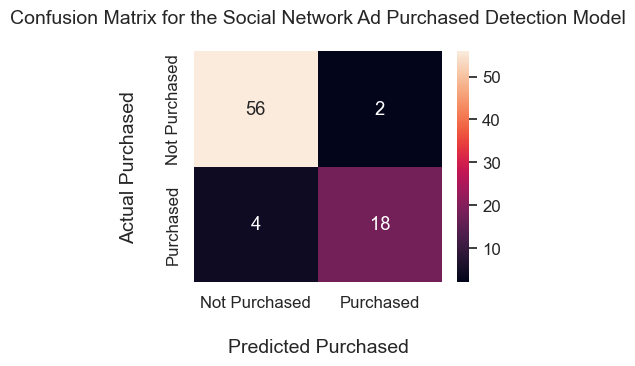

In [53]:
plt.figure(figsize=(4,3), dpi=100)

sns.set(font_scale = 1.1)

ax = sns.heatmap(cm, annot=True)

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Purchased", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Not Purchased', 'Purchased'])

# set y-axis label and ticks
ax.set_ylabel("Actual Purchased", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Not Purchased', 'Purchased'])

# set plot title
ax.set_title("Confusion Matrix for the Social Network Ad Purchased Detection Model", fontsize=14, pad=20)

plt.show()

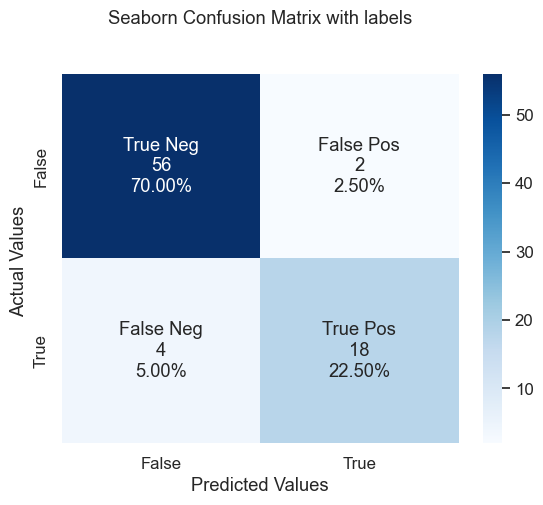

In [54]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

#### Accuracy report

In [55]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['Not Purchased', 'Purchased']))

               precision    recall  f1-score   support

Not Purchased       0.93      0.97      0.95        58
    Purchased       0.90      0.82      0.86        22

     accuracy                           0.93        80
    macro avg       0.92      0.89      0.90        80
 weighted avg       0.92      0.93      0.92        80



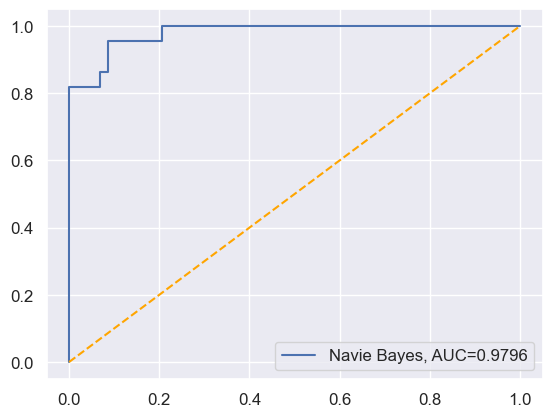

In [89]:
# ROC curve for Navie Bayes 
y_pred_NB = classifer.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_NB)
auc = round(metrics.roc_auc_score(y_test, y_pred_NB), 4)
plt.plot(fpr,tpr,label="Navie Bayes, AUC="+str(auc))
plt.plot([0,1],[0,1],color='orange', linestyle='--')
plt.legend()

##### Create Neural Network model on Social Network Ad data

In [56]:
import tensorflow as tf
from tensorflow.keras.models import Model

In [57]:
ann = tf.keras.models.Sequential()

#adding the layers
ann.add(tf.keras.layers.Dense(units=30, activation='relu'))
ann.add(tf.keras.layers.Dense(units=60, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [58]:
#compiling the ANN
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [59]:
# early stopping callback
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=3, verbose=1, mode='auto')

In [60]:
#training the ANN
ann.fit(X_train,y_train,batch_size =10, epochs =500, verbose=1, callbacks=[early_stopping_callback])

Epoch 1/500
32/32 [==============================] - 1s 8ms/step - loss: 0.5889 - accuracy: 0.7656
Epoch 2/500
32/32 [==============================] - 0s 7ms/step - loss: 0.4739 - accuracy: 0.8062
Epoch 3/500
32/32 [==============================] - 0s 8ms/step - loss: 0.4074 - accuracy: 0.8250
Epoch 4/500
32/32 [==============================] - 0s 8ms/step - loss: 0.3685 - accuracy: 0.8344
Epoch 5/500
32/32 [==============================] - 0s 8ms/step - loss: 0.3369 - accuracy: 0.8906
Epoch 6/500
32/32 [==============================] - 0s 8ms/step - loss: 0.3164 - accuracy: 0.8781
Epoch 7/500
32/32 [==============================] - 0s 8ms/step - loss: 0.2990 - accuracy: 0.8969
Epoch 8/500
32/32 [==============================] - 0s 8ms/step - loss: 0.2877 - accuracy: 0.9000
Epoch 9/500
32/32 [==============================] - 0s 9ms/step - loss: 0.2784 - accuracy: 0.9000
Epoch 10/500
32/32 [==============================] - 0s 8ms/step - loss: 0.2711 - accuracy: 0.9000
Epoch 11/

In [61]:
loss, accuracy = ann.evaluate(X_train,y_train, verbose=0)
print('Train loss:', loss)
print('Train accuracy:', accuracy)

Train loss: 0.22681955993175507
Train accuracy: 0.90625


In [62]:
loss, accuracy = ann.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.15572966635227203
Test accuracy: 0.949999988079071


In [63]:
# create ML classifications models

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [64]:
models = {
    "Logistic Regression": LogisticRegression(C=0.1),
    "KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=5),
    "RandomForestClassifier" : RandomForestClassifier(n_estimators=100),
    "DecisionTreeClassifier" : DecisionTreeClassifier()
}

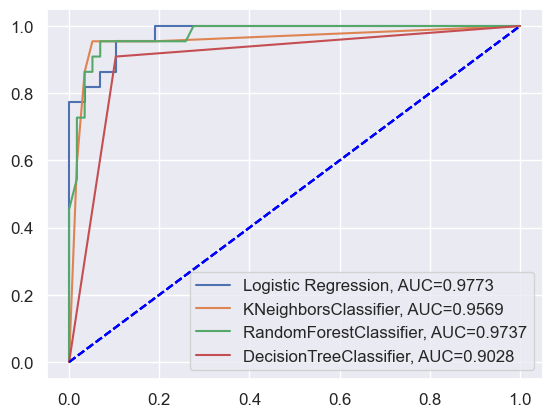

In [88]:
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # predict on train and test data
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    # accuracy for both train and test data
    train_acc= accuracy_score(y_train, y_train_pred)
    test_acc= accuracy_score(y_test, y_pred)
    
    # append all the model resutls to list
    results.append([name, train_acc, test_acc])
    
    y_pred_ = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_)
    auc = round(metrics.roc_auc_score(y_test, y_pred_), 4)
    plt.plot(fpr,tpr,label=name+", AUC="+str(auc))
    plt.plot([0,1],[0,1],color='blue', linestyle='--')

    plt.legend()

In [66]:
df_results = pd.DataFrame(results, columns=["Model Name", "Training accuracy", "Test accuracy"])
df_results

,Model Name,Training accuracy,Test accuracy
0,Logistic Regression,0.815625,0.9250
1,KNeighborsClassifier,0.909375,0.9500
2,RandomForestClassifier,1.000000,0.9250
3,DecisionTreeClassifier,1.000000,0.9125
